<a href="https://colab.research.google.com/github/paubereon/proyecto_cienciadatos/blob/main/PROYECTO_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("moltean/fruits")

print("Path to dataset files:", path)

100%|██████████| 2.34G/2.34G [00:41<00:00, 60.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/moltean/fruits/versions/29


In [ ]:
import os
dataset_path = path
# Rutas del dataset (ajusta según tu descarga)
train_path = os.path.join(dataset_path, "fruits-360_100x100", "fruits-360", "Training")
test_path = os.path.join(dataset_path, "fruits-360_100x100", "fruits-360", "Test")

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Configuración inicial
IMG_SIZE = (100, 100)
BATCH_SIZE = 32
EPOCHS = 20
NUM_CLASSES = 78

import os

# Obtener las clases comunes
train_classes = set(os.listdir(train_path))
test_classes = set(os.listdir(test_path))
common_classes = sorted(list(train_classes & test_classes))

print(f"Clases comunes: {len(common_classes)}")

# Crear nuevos generadores solo con las clases comunes
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=common_classes  # Solo usar clases comunes
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=common_classes,  # Solo usar clases comunes
    shuffle=False
)

# Verificar
print(f"Número de clases en entrenamiento: {train_generator.num_classes}")
print(f"Número de clases en prueba: {test_generator.num_classes}")

# Verificar el número de clases
print(f"Número de clases: {train_generator.num_classes}")
print(f"Clases: {train_generator.class_indices}")



# Ejemplo de uso (necesitas subir una imagen a Colab)
# predict_fruit('/content/tu_imagen_de_fruta.jpg')

Clases comunes: 169
Found 86308 images belonging to 169 classes.
Found 28863 images belonging to 169 classes.
Número de clases en entrenamiento: 169
Número de clases en prueba: 169
Número de clases: 169
Clases: {'Apple 10': 0, 'Apple 12': 1, 'Apple 13': 2, 'Apple 14': 3, 'Apple 17': 4, 'Apple 19': 5, 'Apple 6': 6, 'Apple 9': 7, 'Apple Braeburn 1': 8, 'Apple Core 1': 9, 'Apple Crimson Snow 1': 10, 'Apple Golden 1': 11, 'Apple Golden 2': 12, 'Apple Golden 3': 13, 'Apple Granny Smith 1': 14, 'Apple Pink Lady 1': 15, 'Apple Red 1': 16, 'Apple Red 2': 17, 'Apple Red 3': 18, 'Apple Red Delicious 1': 19, 'Apple Red Yellow 1': 20, 'Apple Red Yellow 2': 21, 'Apple Rotten 1': 22, 'Apple hit 1': 23, 'Apple worm 1': 24, 'Apricot 1': 25, 'Avocado 1': 26, 'Avocado ripe 1': 27, 'Banana 1': 28, 'Banana 3': 29, 'Banana Lady Finger 1': 30, 'Banana Red 1': 31, 'Beans 1': 32, 'Beetroot 1': 33, 'Blackberrie 1': 34, 'Blackberrie 2': 35, 'Blackberrie half rippen 1': 36, 'Blackberrie not rippen 1': 37, 'Blueb

In [ ]:
# Construir el modelo
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.5),

    Dense(512, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_fruit_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')

# Entrenamiento
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=test_generator,
    validation_steps=test_generator.samples // BATCH_SIZE,
    callbacks=[early_stop, checkpoint]
)

# Evaluación
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc:.4f}')




/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 169)                 │          86,697 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,572,777 (9.81 MB)

 Trainable params: 2,572,777 (9.81 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
2697/2697 ━━━━━━━━━━━━━━━━━━━━ 0s 675ms/step - accuracy: 0.2001 - loss: 3.3535

2697/2697 ━━━━━━━━━━━━━━━━━━━━ 1980s 733ms/step - accuracy: 0.2002 - loss: 3.3531 - val_accuracy: 0.7562 - val_loss: 0.8417
Epoch 2/20
   1/2697 ━━━━━━━━━━━━━━━━━━━━ 25:17 563ms/step - accuracy: 0.5938 - loss: 1.3655

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


2697/2697 ━━━━━━━━━━━━━━━━━━━━ 185s 69ms/step - accuracy: 0.5938 - loss: 1.3655 - val_accuracy: 0.7614 - val_loss: 0.8185
Epoch 3/20
2697/2697 ━━━━━━━━━━━━━━━━━━━━ 0s 660ms/step - accuracy: 0.7357 - loss: 0.8218

2697/2697 ━━━━━━━━━━━━━━━━━━━━ 1943s 714ms/step - accuracy: 0.7357 - loss: 0.8217 - val_accuracy: 0.8679 - val_loss: 0.4655
Epoch 4/20
2697/2697 ━━━━━━━━━━━━━━━━━━━━ 142s 53ms/step - accuracy: 0.8125 - loss: 0.4483 - val_accuracy: 0.8653 - val_loss: 0.4725
Epoch 5/20
2697/2697 ━━━━━━━━━━━━━━━━━━━━ 0s 661ms/step - accuracy: 0.8472 - loss: 0.4598

2697/2697 ━━━━━━━━━━━━━━━━━━━━ 2010s 725ms/step - accuracy: 0.8472 - loss: 0.4598 - val_accuracy: 0.9213 - val_loss: 0.2853
Epoch 6/20
2697/2697 ━━━━━━━━━━━━━━━━━━━━ 202s 75ms/step - accuracy: 0.8438 - loss: 0.6222 - val_accuracy: 0.9190 - val_loss: 0.2956
Epoch 7/20
2697/2697 ━━━━━━━━━━━━━━━━━━━━ 0s 667ms/step - accuracy: 0.8941 - loss: 0.3189

2697/2697 ━━━━━━━━━━━━━━━━━━━━ 2002s 733ms/step - accuracy: 0.8941 - loss: 0.3189 - val_accuracy: 0.9396 - val_loss: 0.2629
Epoch 8/20
   1/2697 ━━━━━━━━━━━━━━━━━━━━ 23:51 531ms/step - accuracy: 0.9062 - loss: 0.3310

2697/2697 ━━━━━━━━━━━━━━━━━━━━ 151s 56ms/step - accuracy: 0.9062 - loss: 0.3310 - val_accuracy: 0.9408 - val_loss: 0.2541
Epoch 9/20
2697/2697 ━━━━━━━━━━━━━━━━━━━━ 0s 667ms/step - accuracy: 0.9176 - loss: 0.2416

2697/2697 ━━━━━━━━━━━━━━━━━━━━ 2003s 723ms/step - accuracy: 0.9176 - loss: 0.2416 - val_accuracy: 0.9424 - val_loss: 0.2553
Epoch 10/20
2697/2697 ━━━━━━━━━━━━━━━━━━━━ 203s 75ms/step - accuracy: 0.9688 - loss: 0.1472 - val_accuracy: 0.9394 - val_loss: 0.2559
Epoch 11/20
2697/2697 ━━━━━━━━━━━━━━━━━━━━ 2001s 731ms/step - accuracy: 0.9325 - loss: 0.1967 - val_accuracy: 0.9332 - val_loss: 0.2574
Epoch 12/20
2697/2697 ━━━━━━━━━━━━━━━━━━━━ 202s 75ms/step - accuracy: 0.9375 - loss: 0.2280 - val_accuracy: 0.9338 - val_loss: 0.2565
Epoch 13/20
2697/2697 ━━━━━━━━━━━━━━━━━━━━ 2005s 743ms/step - accuracy: 0.9448 - loss: 0.1593 - val_accuracy: 0.9397 - val_loss: 0.2294
Epoch 14/20
2697/2697 ━━━━━━━━━━━━━━━━━━━━ 204s 75ms/step - accuracy: 0.8750 - loss: 0.2491 - val_accuracy: 0.9372 - val_loss: 0.2371
Epoch 15/20
2697/2697 ━━━━━━━━━━━━━━━━━━━━ 0s 693ms/step - accuracy: 0.9517 - loss: 0.1439

2697/2697 ━━━━━━━━━━━━━━━━━━━━ 2060s 752ms/step - accuracy: 0.9517 - loss: 0.1439 - val_accuracy: 0.9575 - val_loss: 0.1603
Epoch 16/20
2697/2697 ━━━━━━━━━━━━━━━━━━━━ 203s 75ms/step - accuracy: 0.9688 - loss: 0.0854 - val_accuracy: 0.9573 - val_loss: 0.1613
Epoch 17/20
2697/2697 ━━━━━━━━━━━━━━━━━━━━ 2030s 748ms/step - accuracy: 0.9581 - loss: 0.1214 - val_accuracy: 0.9528 - val_loss: 0.2038
Epoch 18/20
2697/2697 ━━━━━━━━━━━━━━━━━━━━ 201s 74ms/step - accuracy: 1.0000 - loss: 0.0069 - val_accuracy: 0.9506 - val_loss: 0.2131
Epoch 19/20
2697/2697 ━━━━━━━━━━━━━━━━━━━━ 0s 689ms/step - accuracy: 0.9628 - loss: 0.1110

2697/2697 ━━━━━━━━━━━━━━━━━━━━ 2013s 746ms/step - accuracy: 0.9628 - loss: 0.1110 - val_accuracy: 0.9679 - val_loss: 0.1406
Epoch 20/20
2697/2697 ━━━━━━━━━━━━━━━━━━━━ 154s 57ms/step - accuracy: 0.9375 - loss: 0.0799 - val_accuracy: 0.9653 - val_loss: 0.1500
902/902 ━━━━━━━━━━━━━━━━━━━━ 160s 177ms/step - accuracy: 0.9704 - loss: 0.1423
Test accuracy: 0.9680


In [ ]:
from google.colab import files

# Primero guarda el modelo como en los ejemplos anteriores
model.save('fruit_detection_model.h5')

# Luego descárgalo
files.download('fruit_detection_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

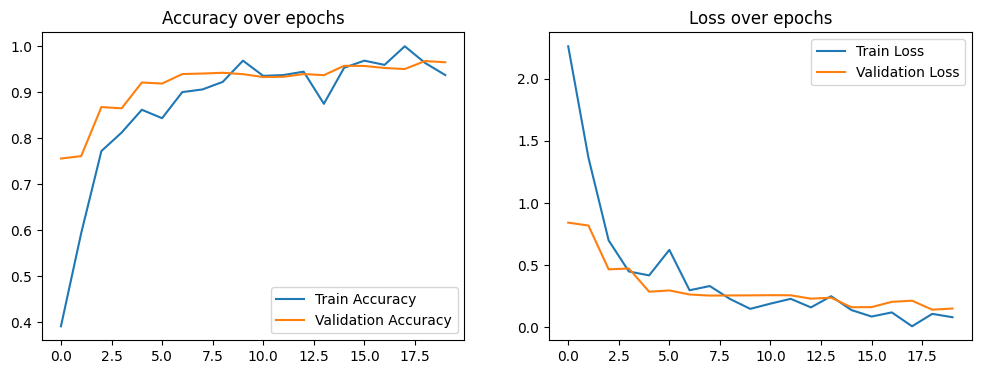

In [ ]:
# Gráficas de entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.legend()
plt.show()


902/902 ━━━━━━━━━━━━━━━━━━━━ 160s 177ms/step
                           precision    recall  f1-score   support

                 Apple 10       0.97      1.00      0.99       231
                 Apple 12       1.00      1.00      1.00       154
                 Apple 13       1.00      1.00      1.00       235
                 Apple 14       1.00      1.00      1.00       154
                 Apple 17       0.98      0.99      0.98       201
                 Apple 19       1.00      1.00      1.00       241
                  Apple 6       0.91      1.00      0.95       157
                  Apple 9       0.91      1.00      0.95       231
         Apple Braeburn 1       0.95      1.00      0.98       164
             Apple Core 1       1.00      1.00      1.00        78
     Apple Crimson Snow 1       1.00      0.69      0.82       148
           Apple Golden 1       0.83      1.00      0.91       160
           Apple Golden 2       0.99      0.93      0.96       164
           Apple

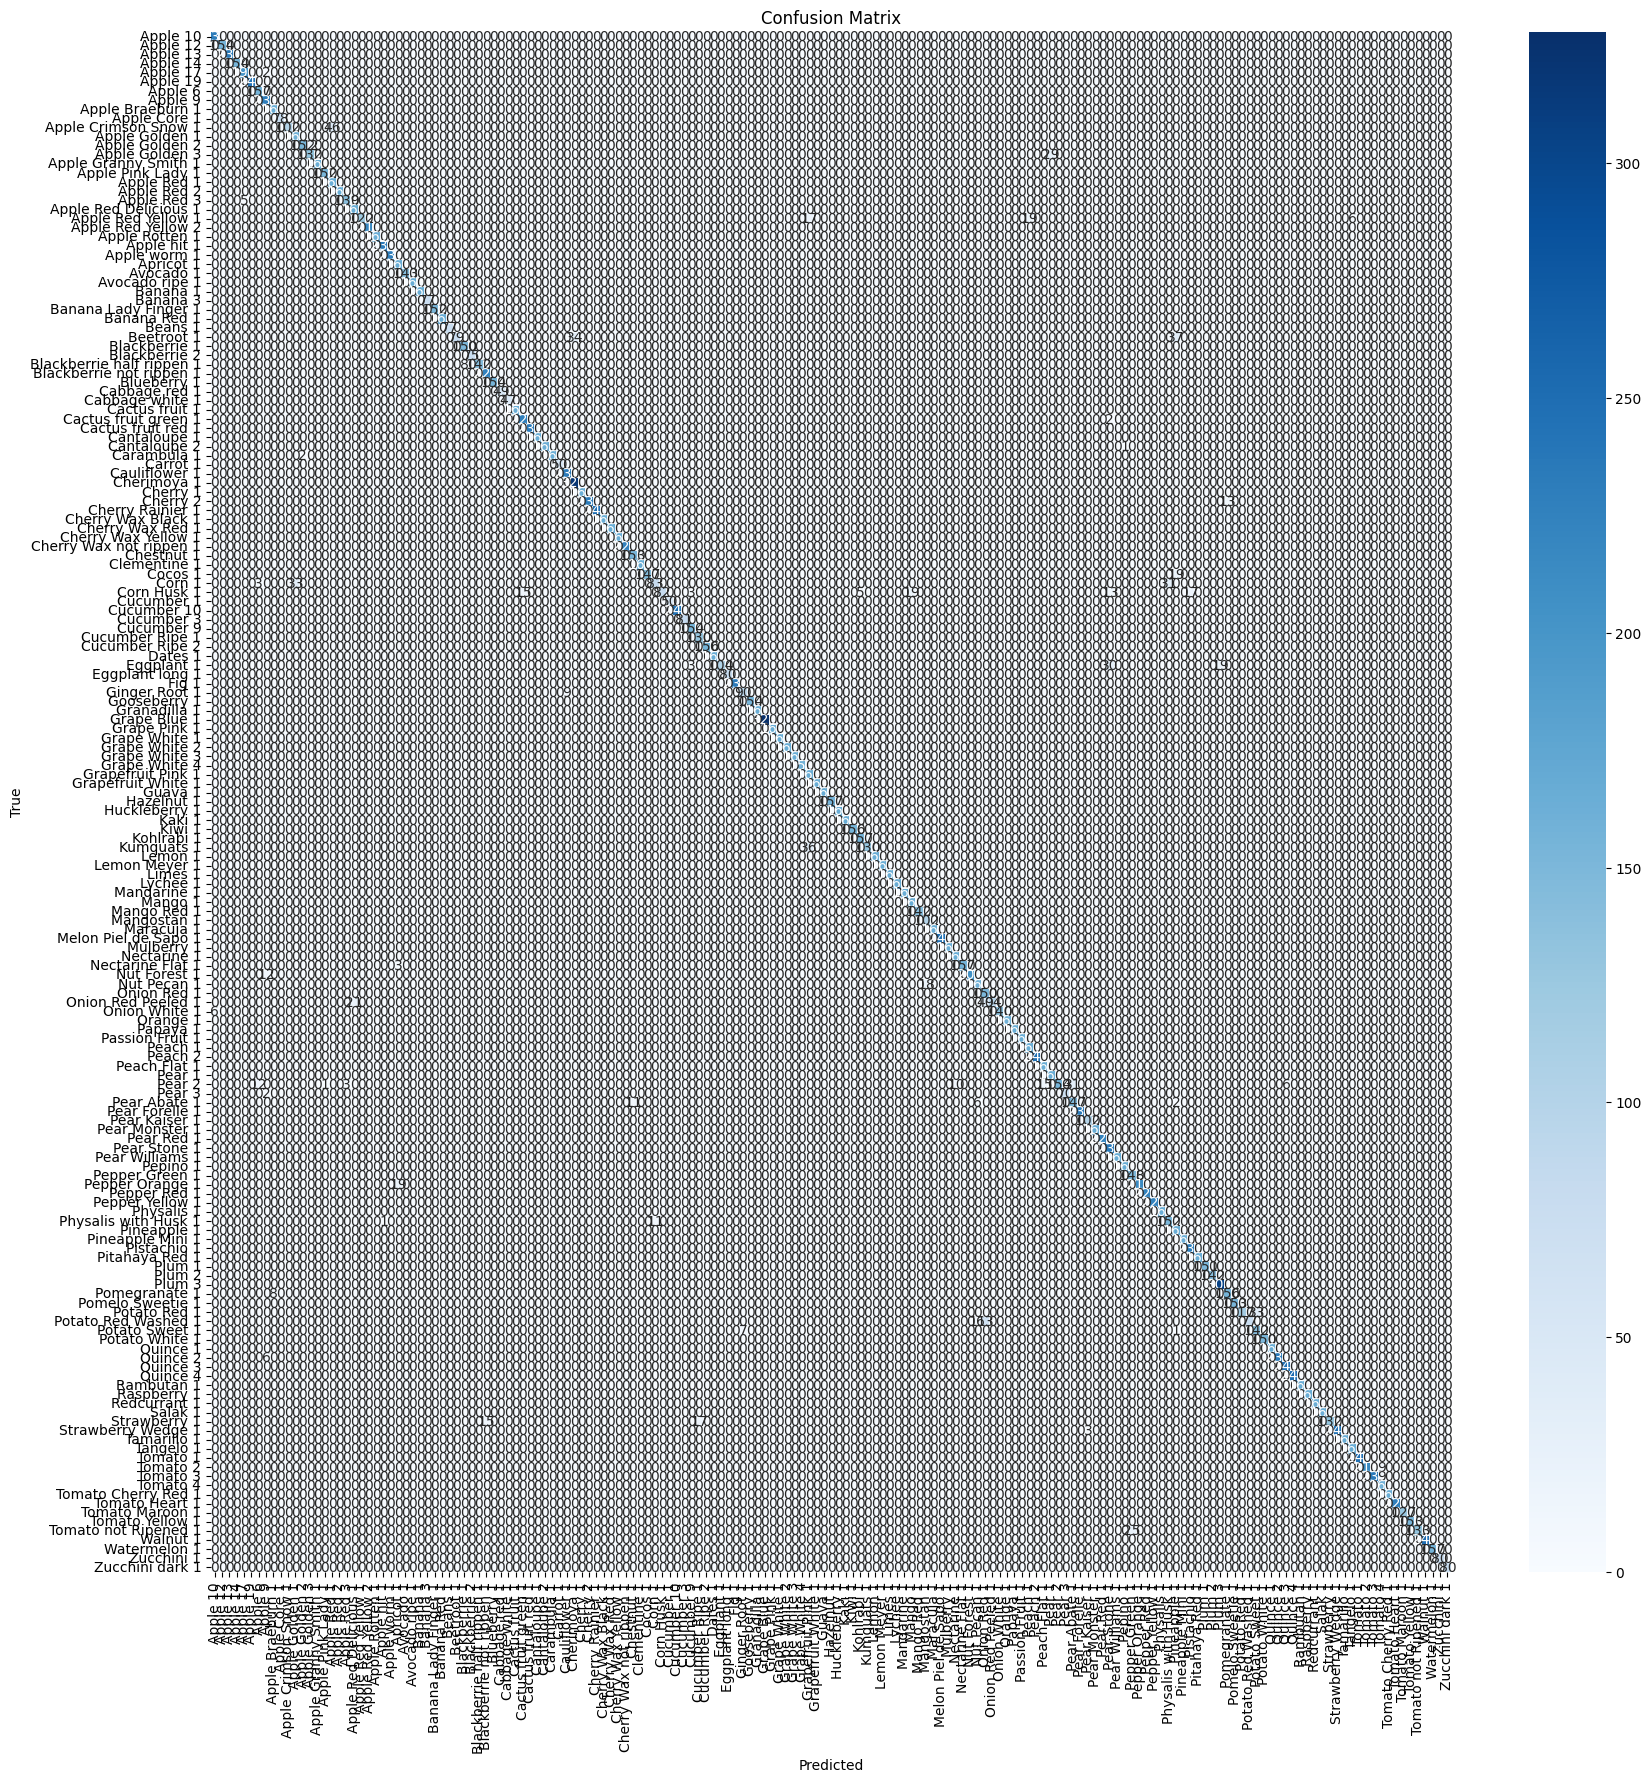

In [ ]:
# Predicciones y matriz de confusión
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

class_names = list(test_generator.class_indices.keys())

# Reporte de clasificación
print(classification_report(y_true, y_pred_classes, target_names=class_names))

# Matriz de confusión (muestra reducida para visualización)
plt.figure(figsize=(20, 20))
cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Función para probar con imágenes individuales
def predict_fruit(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=IMG_SIZE)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction) * 100

    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence:.2f}%")
    plt.axis('off')
    plt.show()

    return predicted_class, confidence

In [ ]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

def predict_fruit(image_path, model, class_indices, top_n=5):
    # Cargar la imagen
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir a RGB
    img = cv2.resize(img, (100, 100))  # Redimensionar
    img = img / 255.0  # Normalizar
    img = np.expand_dims(img, axis=0)  # Agregar dimensión batch

    # Mostrar la imagen
    plt.imshow(img[0])
    plt.axis('off')
    plt.show()

    # Hacer la predicción
    prediction = model.predict(img)[0]  # Obtener las probabilidades

    # Obtener nombres de las clases
    class_labels = {v: k for k, v in class_indices.items()}  # Invertir el diccionario

    # Ordenar las clases por probabilidad (de mayor a menor)
    sorted_indices = np.argsort(prediction)[::-1]

    # Mostrar las N mejores predicciones
    print(f"Top {top_n} frutas detectadas:")
    for i in range(top_n):
        fruit_name = class_labels[sorted_indices[i]]
        probability = prediction[sorted_indices[i]] * 100  # Convertir a porcentaje
        print(f"{i+1}. {fruit_name}: {probability:.2f}%")



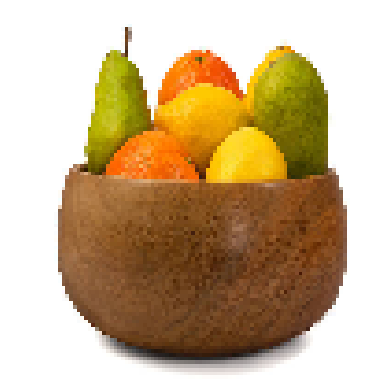

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Top 5 frutas detectadas:
1. Apple Red Yellow 2: 98.87%
2. Carambula 1: 1.13%
3. Apple 6: 0.00%
4. Cherry Wax not rippen 1: 0.00%
5. Papaya 1: 0.00%


In [ ]:
predict_fruit('prueba.jpg', model, train_generator.class_indices, top_n=5)


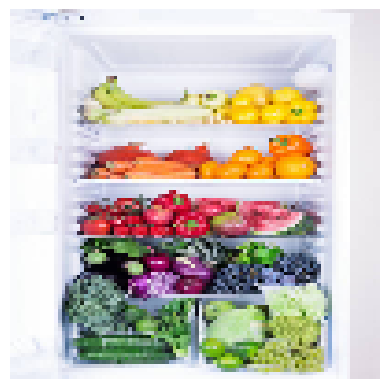

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Top 70 frutas detectadas:
1. Blackberrie not rippen 1: 56.52%
2. Mangostan 1: 27.37%
3. Strawberry 1: 14.87%
4. Carambula 1: 0.34%
5. Pineapple Mini 1: 0.28%
6. Onion Red 1: 0.25%
7. Cucumber Ripe 1: 0.14%
8. Peach Flat 1: 0.13%
9. Strawberry Wedge 1: 0.05%
10. Cactus fruit 1: 0.02%
11. Pear Kaiser 1: 0.01%
12. Nut Forest 1: 0.00%
13. Blackberrie half rippen 1: 0.00%
14. Apple 9: 0.00%
15. Pineapple 1: 0.00%
16. Tomato 3: 0.00%
17. Granadilla 1: 0.00%
18. Apple Red 1: 0.00%
19. Peach 1: 0.00%
20. Cauliflower 1: 0.00%
21. Pear Abate 1: 0.00%
22. Pistachio 1: 0.00%
23. Blackberrie 1: 0.00%
24. Pitahaya Red 1: 0.00%
25. Apple Red Yellow 2: 0.00%
26. Pear Forelle 1: 0.00%
27. Pear Stone 1: 0.00%
28. Nectarine Flat 1: 0.00%
29. Nut Pecan 1: 0.00%
30. Apple Core 1: 0.00%
31. Mango Red 1: 0.00%
32. Apple worm 1: 0.00%
33. Cactus fruit red 1: 0.00%
34. Apple 12: 0.00%
35. Apple hit 1: 0.00%
36. Quince 4: 0.00%
37. Ginger Root 1: 0.00%
38. Plum 1: 0.00%
39.

In [ ]:
predict_fruit('prueba3.jpg', model, train_generator.class_indices, top_n=70)
